In [62]:
import pandas as pd
import yfinance as yf
from datetime import datetime

start_date = datetime.now() - pd.DateOffset(months=10)
end_date = datetime.now()

tickers = ['AAPL', 'MSFT', 'NFLX', 'GOOG','INTC']

df_list = []

for ticker in tickers:
    data = yf.download(ticker, start=start_date, end=end_date)
    df_list.append(data)

df = pd.concat(df_list, keys=tickers, names=['Ticker', 'Date'])
print(df.head())

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
                         Open        High         Low       Close   Adj Close  \
Ticker Date                                                                     
AAPL   2023-01-09  130.470001  133.410004  129.889999  130.149994  129.597076   
       2023-01-10  130.259995  131.259995  128.119995  130.729996  130.174622   
       2023-01-11  131.250000  133.509995  130.460007  133.490005  132.922897   
       2023-01-12  133.880005  134.259995  131.440002  133.410004  132.843246   
       2023-01-13  132.029999  134.919998  131.660004  134.759995  134.187500   

                     Volume  
Ticker Date                  
AAPL   2023-01-09  70790800

In [63]:
df = df.reset_index()
print(df.head())

  Ticker       Date        Open        High         Low       Close  \
0   AAPL 2023-01-09  130.470001  133.410004  129.889999  130.149994   
1   AAPL 2023-01-10  130.259995  131.259995  128.119995  130.729996   
2   AAPL 2023-01-11  131.250000  133.509995  130.460007  133.490005   
3   AAPL 2023-01-12  133.880005  134.259995  131.440002  133.410004   
4   AAPL 2023-01-13  132.029999  134.919998  131.660004  134.759995   

    Adj Close    Volume  
0  129.597076  70790800  
1  130.174622  63896200  
2  132.922897  69458900  
3  132.843246  71379600  
4  134.187500  57809700  


In [64]:
import plotly.express as px
fig = px.line(df, x='Date', 
              y='Close', 
              color='Ticker', 
              title="Stock Market Performance for the Last 10 Months")
fig.show()

In [66]:
fig = px.area(df, x='Date', y='Close', color='Ticker',
              facet_col='Ticker',
              labels={'Date':'Date', 'Close':'Closing Price', 'Ticker':'Company'},
              title='Stock Prices for Apple, Microsoft, Netflix,Intel Corp and Google')
fig.show()

In [67]:
df['MA10'] = df.groupby('Ticker')['Close'].rolling(window=10).mean().reset_index(0, drop=True)
df['MA20'] = df.groupby('Ticker')['Close'].rolling(window=20).mean().reset_index(0, drop=True)

for ticker, group in df.groupby('Ticker'):
    print(f'Moving Averages for {ticker}')
    print(group[['MA10', 'MA20']])

Moving Averages for AAPL
           MA10        MA20
0           NaN         NaN
1           NaN         NaN
2           NaN         NaN
3           NaN         NaN
4           NaN         NaN
..          ...         ...
204  171.789001  174.828002
205  171.602002  174.843502
206  171.813002  174.976502
207  172.190001  174.934502
208  172.813000  174.946501

[209 rows x 2 columns]
Moving Averages for GOOG
           MA10        MA20
627         NaN         NaN
628         NaN         NaN
629         NaN         NaN
630         NaN         NaN
631         NaN         NaN
..          ...         ...
831  131.757999  135.466000
832  130.587000  135.031000
833  129.547000  134.660500
834  128.909999  134.242500
835  128.264999  133.839999

[209 rows x 2 columns]
Moving Averages for INTC
        MA10     MA20
836      NaN      NaN
837      NaN      NaN
838      NaN      NaN
839      NaN      NaN
840      NaN      NaN
...      ...      ...
1040  34.775  35.5280
1041  34.940  35.5960
1042  3

In [68]:
for ticker, group in df.groupby('Ticker'):
    fig = px.line(group, x='Date', y=['Close', 'MA10', 'MA20'], 
                  title=f"{ticker} Moving Averages")
    fig.show()

In [69]:
df['Volatility'] = df.groupby('Ticker')['Close'].pct_change().rolling(window=10).std().reset_index(0, drop=True)
fig = px.line(df, x='Date', y='Volatility', 
              color='Ticker', 
              title='Volatility of All Companies')
fig.show()

In [70]:
# create a DataFrame with the stock prices of Apple and Microsoft
apple = df.loc[df['Ticker'] == 'AAPL', ['Date', 'Close']].rename(columns={'Close': 'AAPL'})
microsoft = df.loc[df['Ticker'] == 'MSFT', ['Date', 'Close']].rename(columns={'Close': 'MSFT'})
intc = df.loc[df['Ticker'] == 'INTC', ['Date', 'Close']].rename(columns={'Close': 'INTC'})
netflix = df.loc[df['Ticker'] == 'NFLX', ['Date', 'Close']].rename(columns={'Close': 'NFLX'})
google = df.loc[df['Ticker'] == 'GOOG', ['Date', 'Close']].rename(columns={'Close': 'GOOG'})

df_corr = pd.merge(apple, microsoft, on='Date')

# create a scatter plot to visualize the correlation
fig = px.scatter(df_corr, x='AAPL', y='MSFT', 
                 trendline='ols', 
                 title='Correlation between APPLE and MICROSOFT')
fig.show()

df_corr = pd.merge(netflix, intc, on='Date')
fig = px.scatter(df_corr, x='INTC', y='NFLX', 
                 trendline='ols', 
                 title='Correlation between INTEL and NETFLIX')
fig.show()

df_corr = pd.merge(google, netflix, on='Date')
fig = px.scatter(df_corr, x='GOOG', y='NFLX', 
                 trendline='ols', 
                 title='Correlation between GOOGLE and NETFLIX')
fig.show()

df_corr = pd.merge(apple, intc, on='Date')
fig = px.scatter(df_corr, x='INTC', y='AAPL', 
                 trendline='ols', 
                 title='Correlation between INTEL and APPLE')
fig.show()

df_corr = pd.merge(microsoft, google, on='Date')
fig = px.scatter(df_corr, x='MSFT', y='GOOG', 
                 trendline='ols', 
                 title='Correlation between MICROSOFT and GOOGLE')
fig.show()

df_corr = pd.merge(microsoft, intc, on='Date')
fig = px.scatter(df_corr, x='INTC', y='MSFT', 
                 trendline='ols', 
                 title='Correlation between INTEL and MICROSOFT')
fig.show()

In [71]:
apple = df.loc[df['Ticker'] == 'AAPL', ['Date', 'Close']].rename(columns={'Close': 'AAPL'})
microsoft = df.loc[df['Ticker'] == 'MSFT', ['Date', 'Close']].rename(columns={'Close': 'MSFT'})
intc = df.loc[df['Ticker'] == 'INTC', ['Date', 'Close']].rename(columns={'Close': 'INTC'})
netflix = df.loc[df['Ticker'] == 'NFLX', ['Date', 'Close']].rename(columns={'Close': 'NFLX'})
google = df.loc[df['Ticker'] == 'GOOG', ['Date', 'Close']].rename(columns={'Close': 'GOOG'})

print("Available tickers: AAPL, MSFT, INTC, NFLX, GOOG")

input1 = input("Enter first ticker: ")
input2 = input("Enter second ticker: ")
df_input1 = df.loc[df['Ticker'] == input1, ['Date', 'Close']].rename(columns={'Close': input1})
df_input2 = df.loc[df['Ticker'] == input2, ['Date', 'Close']].rename(columns={'Close': input2})


df_corr = pd.merge(df_input1, df_input2, on='Date')

correlation = df_corr[input1].corr(df_corr[input2])


# create a scatter plot to visualize the correlation
fig = px.scatter(df_corr, x=input1, y=input2, 
                 trendline='ols', 
                 title=f'Correlation between {input1} and {input2}\nCorrelation Coefficient: {correlation:.2f}')
fig.show()

Available tickers: AAPL, MSFT, INTC, NFLX, GOOG
Enter first ticker: AAPL
Enter second ticker: GOOG


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


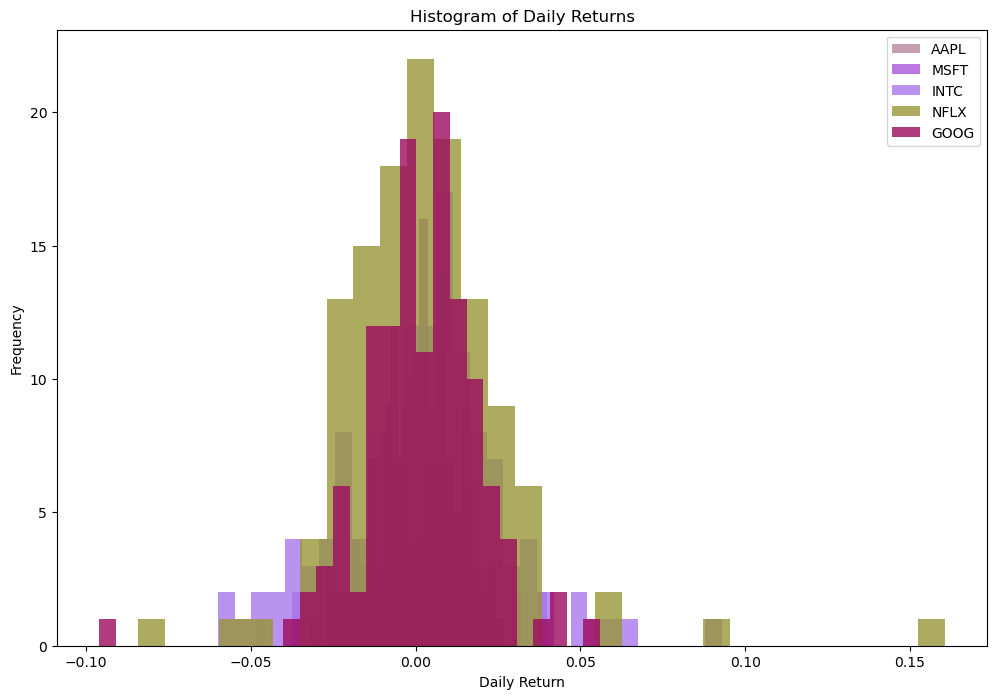

In [73]:
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from datetime import datetime
import random

def plot_histogram(ticker):
    # Retrieve stock data using yfinance
    df = yf.download(ticker, start=start_date, end=end_date)
    
    # Calculate daily returns
    df['Daily_Return'] = df['Close'].pct_change()
    
    # Remove the first row (NaN value due to no previous day)
    df = df.dropna()
    
    # Generate a random color for the histogram
    color = "#{:02x}{:02x}{:02x}".format(random.randint(0, 255), random.randint(0, 255), random.randint(0, 255))
    
    # Draw the histogram
    plt.hist(df['Daily_Return'], bins=30, alpha=0.8, color=color, label=ticker)

# Define the stock symbols
symbols = ['AAPL', 'MSFT', 'INTC', 'NFLX', 'GOOG']

# Define the date range
start_date = datetime.now() - pd.DateOffset(months=6)
end_date = datetime.now()

# Create subplots to display all histograms
fig, ax = plt.subplots(figsize=(12, 8))

# Plot histograms for all tickers
for symbol in symbols:
    plot_histogram(symbol)

# Add legend
ax.legend()

# Set labels and title
plt.title('Histogram of Daily Returns')
plt.xlabel('Daily Return')
plt.ylabel('Frequency')

# Show the plot
plt.show()


[*********************100%***********************]  1 of 1 completed


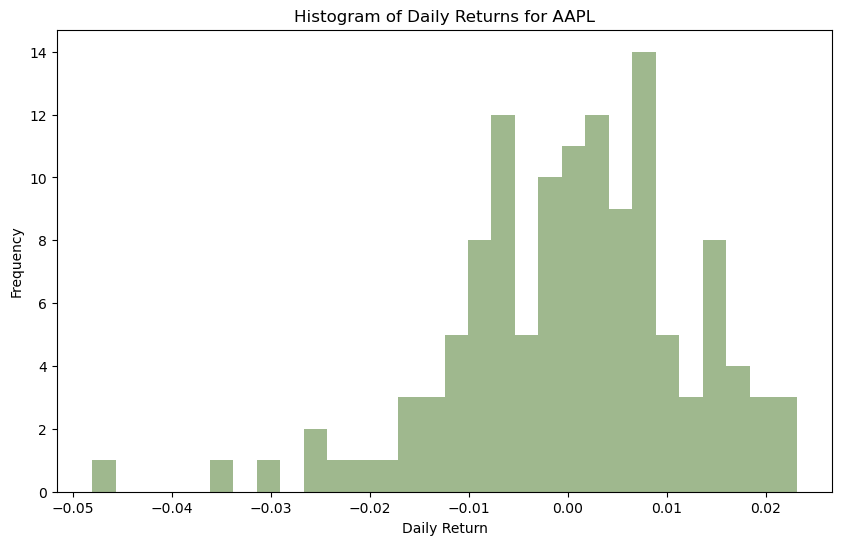

[*********************100%***********************]  1 of 1 completed


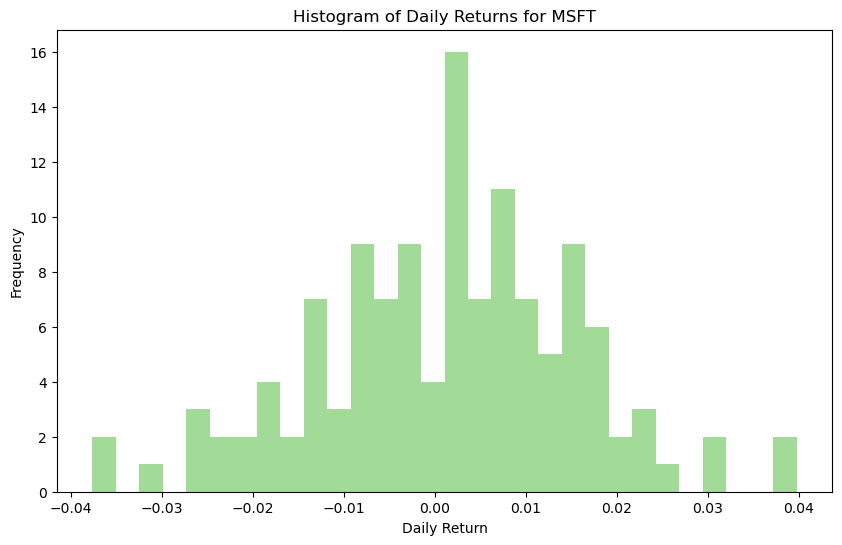

[*********************100%***********************]  1 of 1 completed


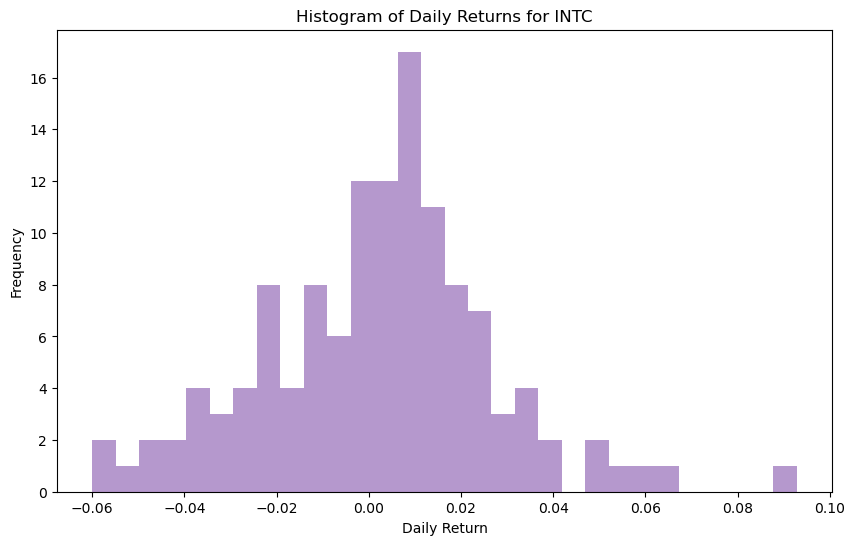

[*********************100%***********************]  1 of 1 completed


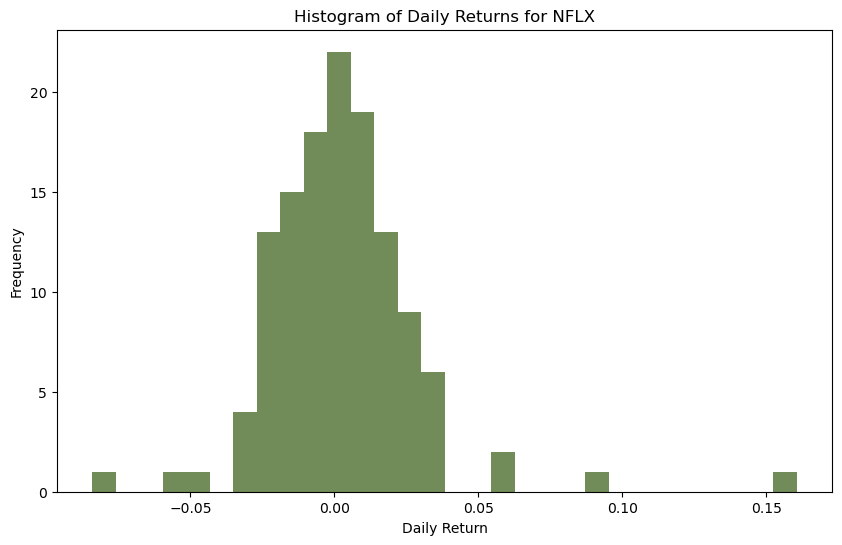

[*********************100%***********************]  1 of 1 completed


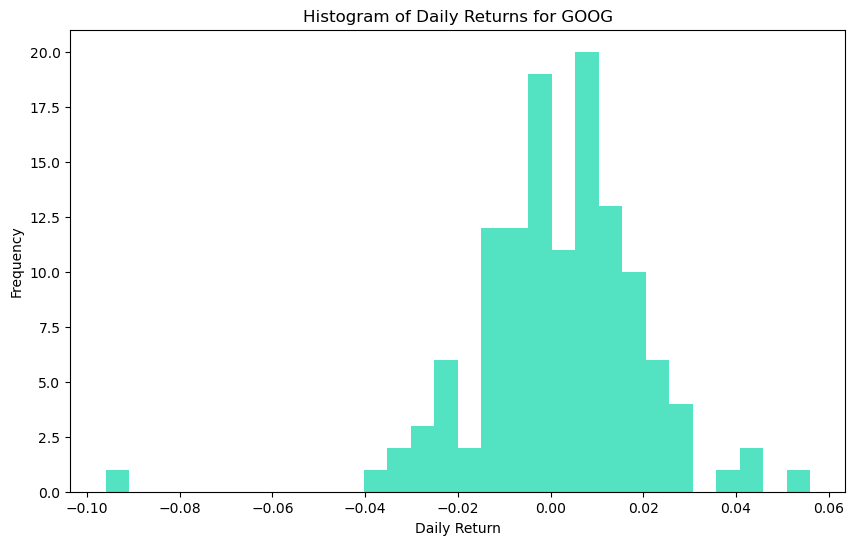

In [74]:
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from datetime import datetime

# Define the stock symbols
symbols = ['AAPL', 'MSFT', 'INTC', 'NFLX', 'GOOG']

# Define the date range
start_date = datetime.now() - pd.DateOffset(months=6)
end_date = datetime.now()

# Loop through each ticker and generate a separate histogram
for symbol in symbols:
    # Retrieve stock data using yfinance
    df = yf.download(symbol, start=start_date, end=end_date)
    
    # Calculate daily returns
    df['Daily_Return'] = df['Close'].pct_change()
    
    # Remove the first row (NaN value due to no previous day)
    df = df.dropna()
    
    # Generate a random color for the histogram
    color = "#{:02x}{:02x}{:02x}".format(random.randint(0, 255), random.randint(0, 255), random.randint(0, 255))
    
    # Draw the histogram
    plt.figure(figsize=(10, 6))
    plt.hist(df['Daily_Return'], bins=30, color=color, alpha=0.7)
    plt.title(f'Histogram of Daily Returns for {symbol}')
    plt.xlabel('Daily Return')
    plt.ylabel('Frequency')
    plt.show()


[*********************100%***********************]  1 of 1 completed


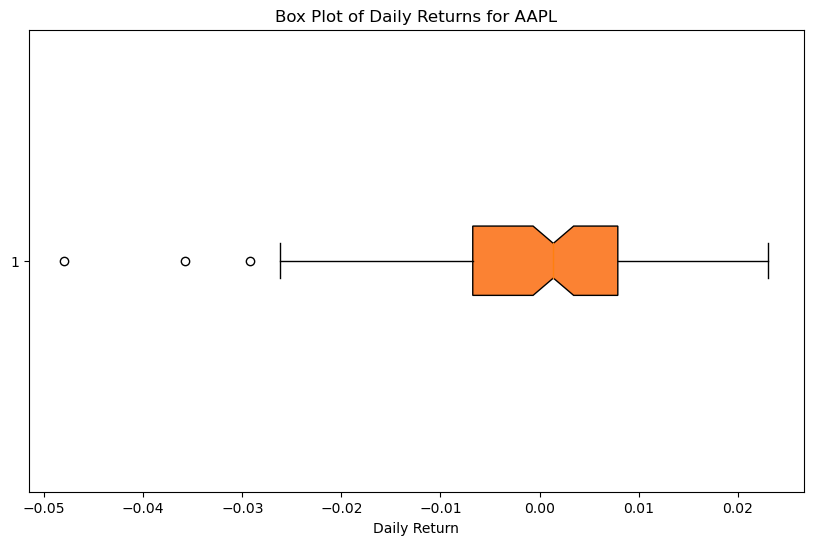

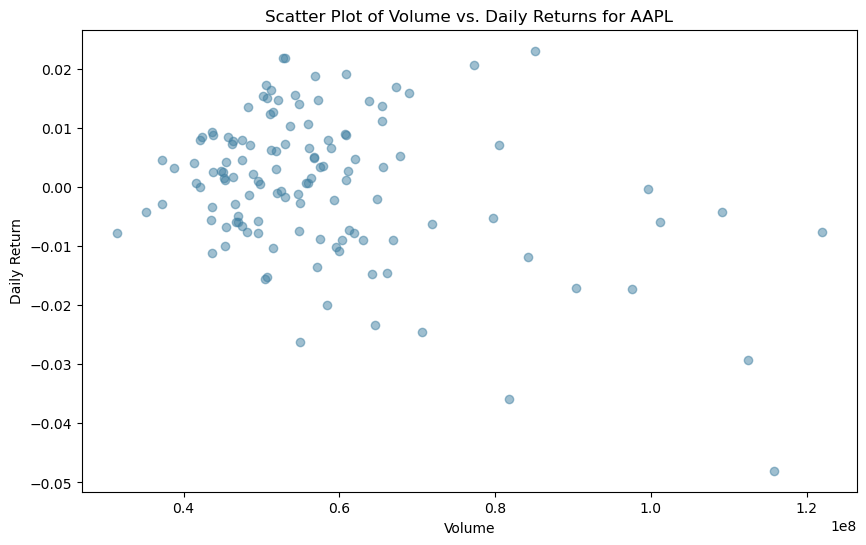

[*********************100%***********************]  1 of 1 completed


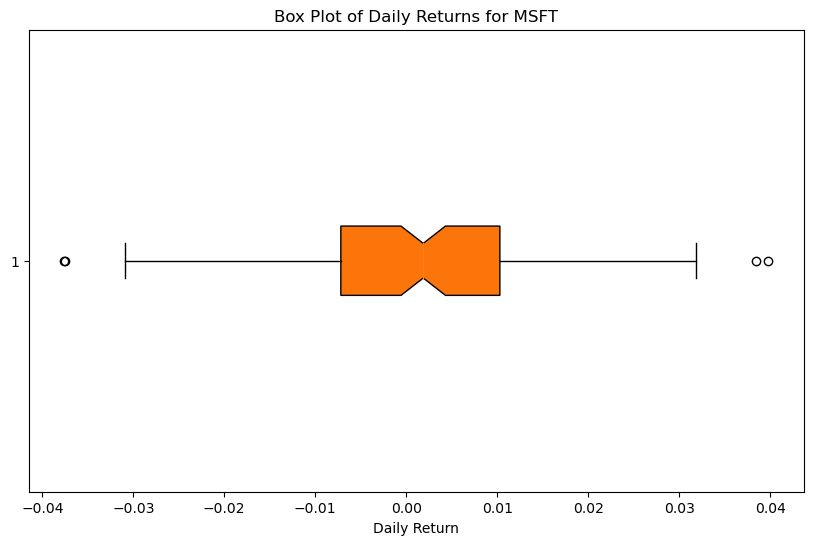

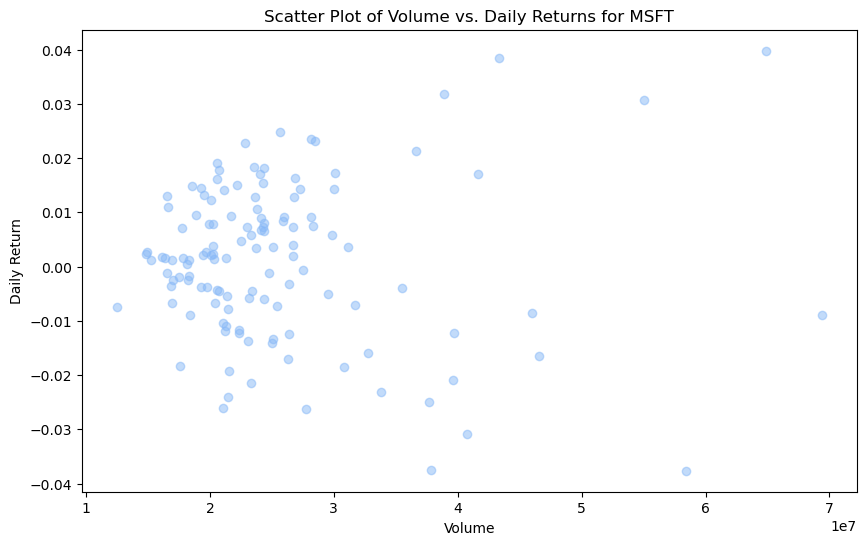

[*********************100%***********************]  1 of 1 completed


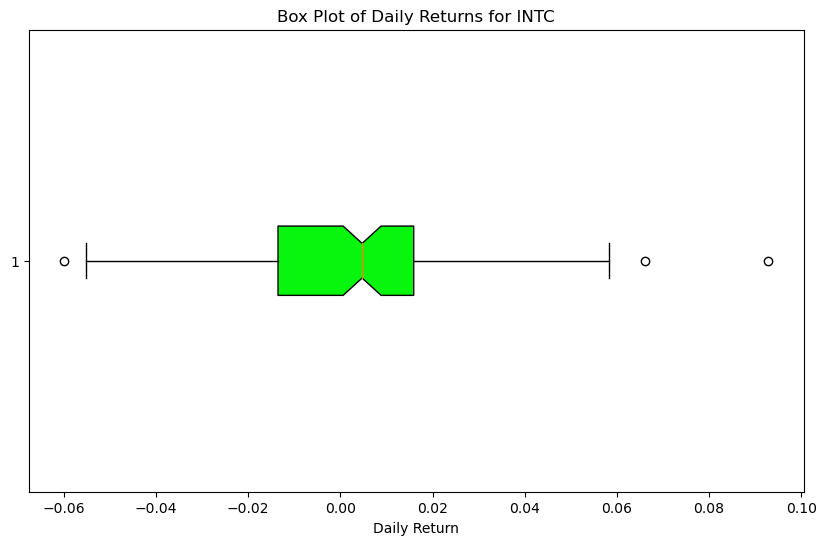

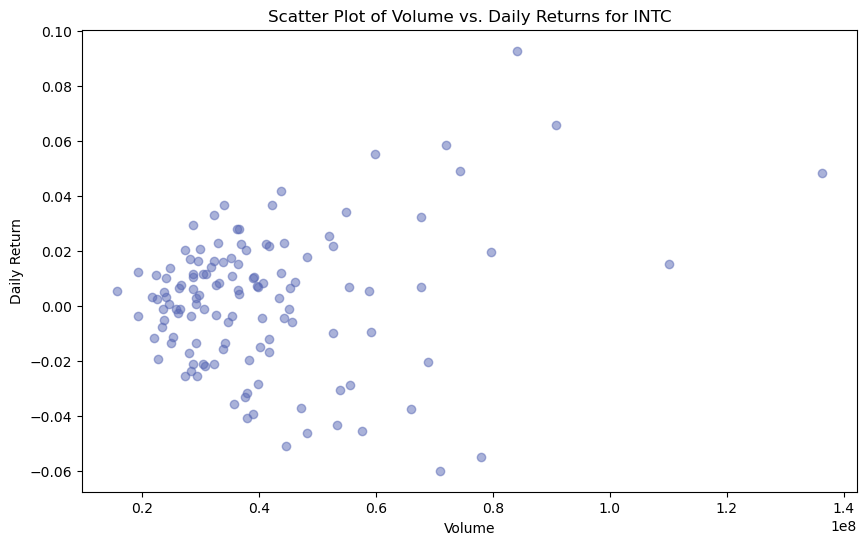

[*********************100%***********************]  1 of 1 completed


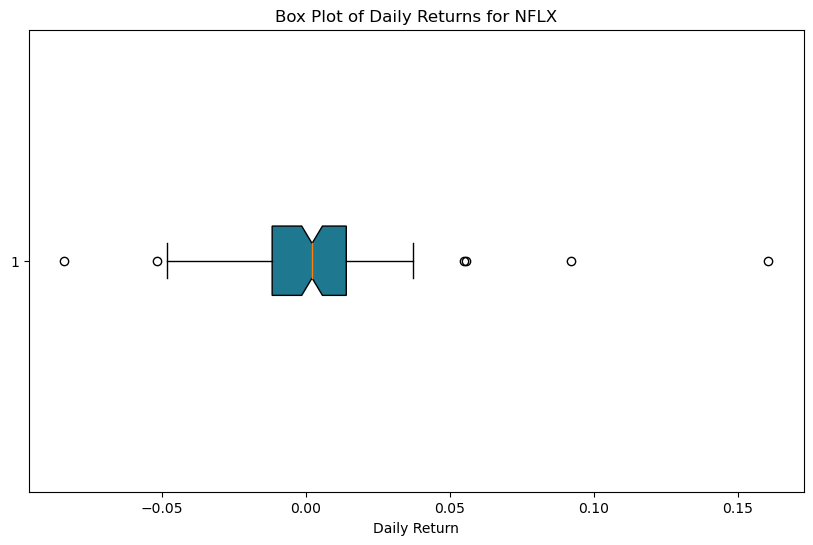

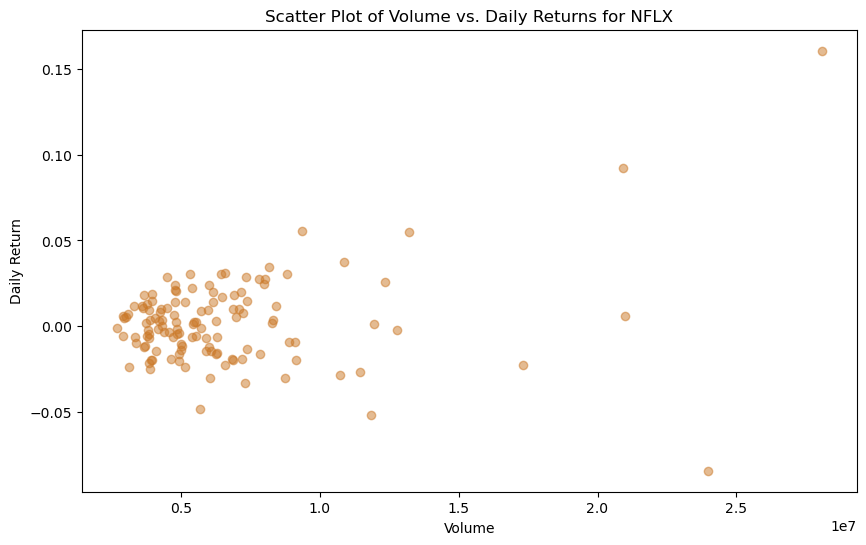

[*********************100%***********************]  1 of 1 completed


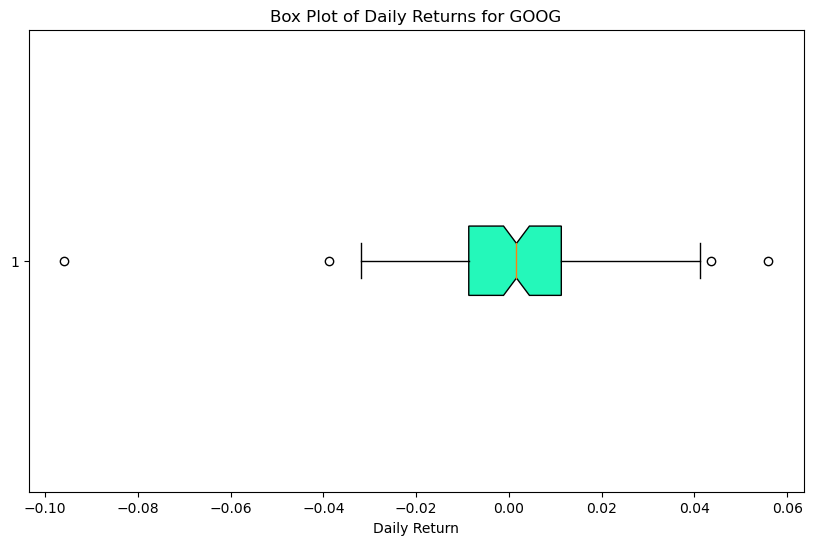

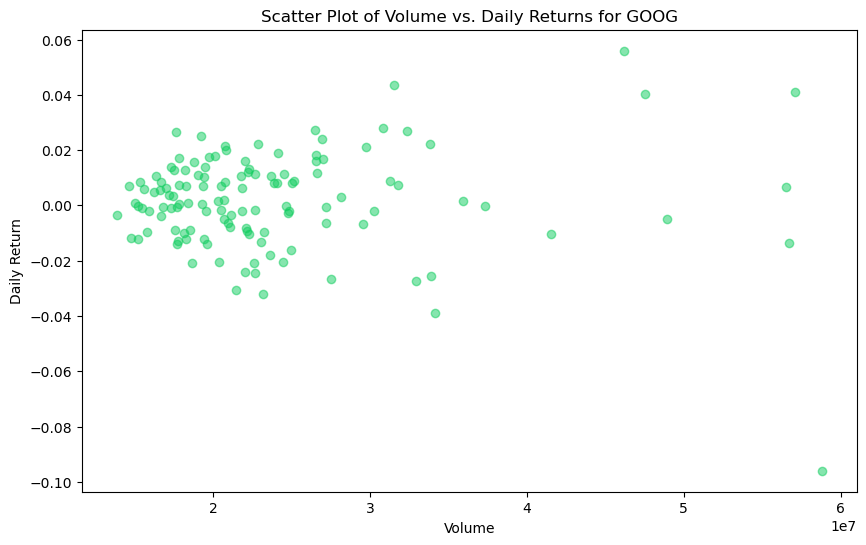

In [61]:
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from datetime import datetime
import random

# Define the stock symbols
symbols = ['AAPL', 'MSFT', 'INTC', 'NFLX', 'GOOG']

# Define the date range
start_date = datetime.now() - pd.DateOffset(months=6)
end_date = datetime.now()

# Loop through each ticker and generate box plots and scatter plots
for symbol in symbols:
    # Retrieve stock data using yfinance
    df = yf.download(symbol, start=start_date, end=end_date)
    
    # Calculate daily returns
    df['Daily_Return'] = df['Close'].pct_change()
    
    # Remove the first row (NaN value due to no previous day)
    df = df.dropna()
    
    # Generate a random color for the box plot
    color_box = "#{:02x}{:02x}{:02x}".format(random.randint(0, 255), random.randint(0, 255), random.randint(0, 255))
    
    # Generate a random color for the scatter plot
    color_scatter = "#{:02x}{:02x}{:02x}".format(random.randint(0, 255), random.randint(0, 255), random.randint(0, 255))
    
    # Draw the box plot
    plt.figure(figsize=(10, 6))
    plt.boxplot(df['Daily_Return'], notch=True, vert=False, patch_artist=True, boxprops=dict(facecolor=color_box))
    plt.title(f'Box Plot of Daily Returns for {symbol}')
    plt.xlabel('Daily Return')
    plt.show()
    
    # Draw the scatter plot
    plt.figure(figsize=(10, 6))
    plt.scatter(df['Volume'], df['Daily_Return'], color=color_scatter, alpha=0.5)
    plt.title(f'Scatter Plot of Volume vs. Daily Returns for {symbol}')
    plt.xlabel('Volume')
    plt.ylabel('Daily Return')
    plt.show()
